# Exploratory Data Analysis
   ---
*By Tan Yu Xuan                    08 Feb 2023*

# Imported Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# change to nicer default style
plt.style.use('seaborn')
%matplotlib inline

The dataset was downloaded from https://www.kaggle.com/datasets/venky73/spam-mails-dataset, containing spam and ham messages.

**List of attributes**

| Attribute | Description |
|-----------|-------------|
|label|Labels of Emails [spam or ham]|
|text|Emails data|
|label_num|output class [1: spam, 0: ham]|

# Importing Dataset

In [152]:
# Read csv into pandas DataFrame
df = pd.read_csv(r'data\spam_ham_dataset.csv')
# Removing Unnecessary column
df.drop('Unnamed: 0', axis=1, inplace = True)

# Spam / Ham Dataset

In [153]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [154]:
df.tail()

,label,text,label_num
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0
5170,spam,Subject: important online banking alert\r\ndea...,1


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [156]:
df.nunique()

label           2
text         4993
label_num       2
dtype: int64

In [157]:
df.isna().sum()

label        0
text         0
label_num    0
dtype: int64

No missing values.

# Feature Engineering

## Length
Create new column ‘length’ to find out length of emails.

In [158]:
df["length"] = df["text"].apply(len)
df.sort_values(by='length', ascending=False).head(10)

,label,text,label_num,length
949,ham,"Subject: fw : "" red , white and blue out ""\r\n...",0,32258
1988,spam,Subject: online pharxmacy 80 % off all meds\r\...,1,22073
3560,ham,Subject: fw : thought this was important\r\nba...,0,16338
4287,ham,Subject: the expatriate zone - issue # 1 2 / 1...,0,16312
4792,spam,"Subject: we ' ve got your info by internet , h...",1,14716
4903,ham,Subject: re : coastal oil & gas corporation\r\...,0,13448
2935,ham,Subject: re : coastal oil & gas corporation\r\...,0,13440
828,ham,Subject: re : coastal oil & gas corporation\r\...,0,13101
3514,spam,Subject: free profiles you choose derm\r\nhtml...,1,12078
4249,ham,Subject: re : sitara release ( re : changes in...,0,11776


## Text
1. Remove all punctuations from string.
2. Convert all strings to their lower case form.
3. Perform Tokenization
4. Remove stopwords

In [159]:
#import string
#new_text = df['text'].str.translate(str.maketrans('', '', string.punctuation))

In [160]:
# Remove all punctuations
df['new_text'] = df['text'].str.replace('\W', ' ', regex=True)

In [163]:
# Convert all strings to lower case form
df['new_text'] = df['new_text'].str.lower()

In [170]:
# Tokenize words
df['new_text'] = df['new_text'].apply(word_tokenize)

In [172]:
# Remove stopwords
stop = stopwords.words('english')

df['new_text'] = df['new_text'].apply(lambda x: [item for item in x if item not in stop])

In [173]:
df.head()

,label,text,label_num,length,new_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,"[subject, enron, methanol, meter, 988291, foll..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,"[subject, hpl, nom, january, 9, 2001, see, att..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,"[subject, neon, retreat, ho, ho, ho, around, w..."
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,"[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,"[subject, indian, springs, deal, book, teco, p..."


# EDA

## Label

[Text(0.5, 1.0, 'Countplot of Label')]

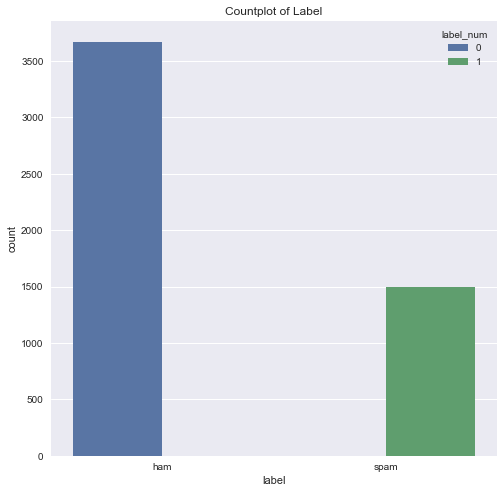

In [64]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='label', hue='label_num').set(title='Countplot of Label')

From the plot, there are lesser spam mails.

## Length

In [36]:
df[df['label'] == 'spam'].describe()

,label_num,length
count,1499.0,1499.000000
mean,1.0,1223.256171
std,0.0,1825.986210
min,1.0,11.000000
25%,1.0,283.000000
50%,1.0,576.000000
75%,1.0,1253.500000
max,1.0,22073.000000


In [37]:
df[df['label'] == 'ham'].describe()

,label_num,length
count,3672.0,3672.000000
mean,0.0,977.008170
std,0.0,1382.827493
min,0.0,18.000000
25%,0.0,231.750000
50%,0.0,530.000000
75%,0.0,1227.250000
max,0.0,32258.000000


<AxesSubplot:xlabel='length', ylabel='label'>

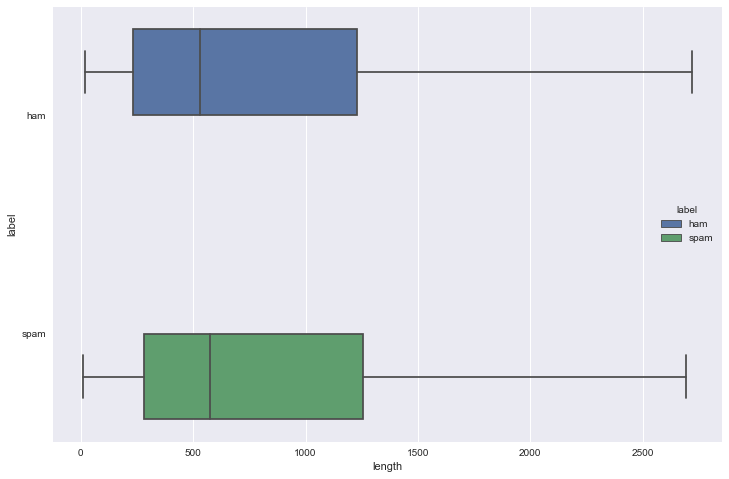

In [63]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='label', x='length', hue='label', showfliers = False)

From the histogram, spam emails tend to have more characters in the interquantile range (25% to 75%).

|  | Ham Length | Spam Length |
|--|-----|------|
|mean|977.008170|`1223.256171`|
|min|`18.000000`|11.000000|
|25%|231.750000|`283.000000`|
|50%|530.000000|`576.000000`|
|75%|1227.250000|`1253.500000`|
|max|`32258.000000`|22073.000000|